In [1]:
import sys
print(sys.executable)


D:\Facial_Emotion_Recognition\venv\Scripts\python.exe


In [2]:
!pip install pillow



[notice] A new release of pip is available: 23.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam


In [4]:
train_dir = "../data/train"
test_dir = "../data/test"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode="grayscale",
    batch_size=64,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    color_mode="grayscale",
    batch_size=64,
    class_mode="categorical"
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [6]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))  # 7 emotions


In [7]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [8]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

In [9]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=test_generator
)


Epoch 1/25
449/449 [==============================] - 173s 381ms/step - loss: 1.8398 - accuracy: 0.2327 - val_loss: 1.7935 - val_accuracy: 0.2565
Epoch 2/25
449/449 [==============================] - 138s 308ms/step - loss: 1.7885 - accuracy: 0.2590 - val_loss: 1.7292 - val_accuracy: 0.3072
Epoch 3/25
449/449 [==============================] - 70s 157ms/step - loss: 1.7496 - accuracy: 0.2900 - val_loss: 1.6831 - val_accuracy: 0.3476
Epoch 4/25
449/449 [==============================] - 59s 131ms/step - loss: 1.7168 - accuracy: 0.3144 - val_loss: 1.6269 - val_accuracy: 0.3782
Epoch 5/25
449/449 [==============================] - 59s 132ms/step - loss: 1.6870 - accuracy: 0.3316 - val_loss: 1.5985 - val_accuracy: 0.3902
Epoch 6/25
449/449 [==============================] - 61s 136ms/step - loss: 1.6637 - accuracy: 0.3455 - val_loss: 1.5625 - val_accuracy: 0.4125
Epoch 7/25
449/449 [==============================] - 61s 135ms/step - loss: 1.6459 - accuracy: 0.3554 - val_loss: 1.5559 - val_

In [12]:
loss, accuracy = model.evaluate(test_generator)
print("Test Accuracy:", accuracy)


113/113 [==============================] - 8s 71ms/step - loss: 1.3325 - accuracy: 0.4939
Test Accuracy: 0.49387016892433167


In [14]:
pip install matplotlib


  Using cached matplotlib-3.10.8-cp310-cp310-win_amd64.whl (8.1 MB)
  Using cached pyparsing-3.3.2-py3-none-any.whl (122 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached fonttools-4.61.1-cp310-cp310-win_amd64.whl (1.6 MB)
  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl (221 kB)
  Using cached kiwisolver-1.4.9-cp310-cp310-win_amd64.whl (73 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


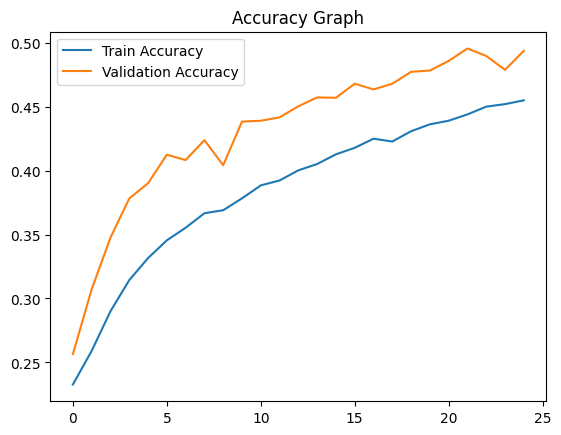

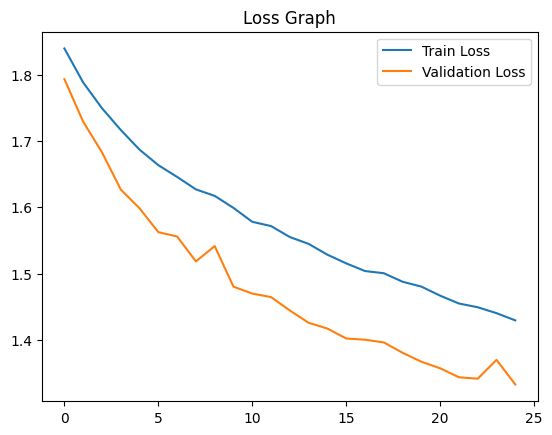

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy Graph")
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Graph")
plt.show()


In [17]:
pip install scikit-learn


  Using cached scikit_learn-1.7.2-cp310-cp310-win_amd64.whl (8.9 MB)
  Using cached joblib-1.5.3-py3-none-any.whl (309 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = test_generator.classes

print(confusion_matrix(y_true, y_pred_classes))
print(classification_report(y_true, y_pred_classes))


113/113 [==============================] - 7s 62ms/step
[[142   0  41 287 183 142 163]
 [ 20   0   7  26  23  15  20]
 [167   0  40 311 205 121 180]
 [284   0 106 550 343 230 261]
 [201   0  56 367 244 176 189]
 [188   0  56 399 210 170 224]
 [129   0  47 221 189 113 132]]
              precision    recall  f1-score   support

           0       0.13      0.15      0.14       958
           1       0.00      0.00      0.00       111
           2       0.11      0.04      0.06      1024
           3       0.25      0.31      0.28      1774
           4       0.17      0.20      0.19      1233
           5       0.18      0.14      0.15      1247
           6       0.11      0.16      0.13       831

    accuracy                           0.18      7178
   macro avg       0.14      0.14      0.13      7178
weighted avg       0.17      0.18      0.17      7178



D:\Facial_Emotion_Recognition\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\Facial_Emotion_Recognition\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\Facial_Emotion_Recognition\venv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0]

In [19]:
model.save("../model/emotion_model.h5")
